In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics


In [2]:
#setting working directory
os.chdir("C:/Users/Ramdu/Downloads/archive (1)")
print(os.getcwd())

C:\Users\Ramdu\Downloads\archive (1)


In [3]:
df = pd.read_csv('who_suicide_statistics.csv')

In [4]:
tbl = df.head(500)


In [5]:
tbl

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
495,Anguilla,1993,female,5-14 years,0.0,NaN
496,Anguilla,1993,female,55-74 years,0.0,NaN
497,Anguilla,1993,female,75+ years,0.0,NaN
498,Anguilla,1993,male,15-24 years,0.0,NaN


In [6]:
tbl.describe()

,year,suicides_no,population
count,500.00000,392.000000,372.000000
mean,1996.88800,5.025510,233851.376344
std,9.50158,7.739318,107517.589896
min,1983.00000,0.000000,21100.000000
25%,1989.00000,0.000000,179855.000000
50%,1995.00000,1.000000,252553.500000
75%,2005.00000,8.000000,306864.000000
max,2015.00000,39.000000,400275.000000


In [7]:
np.mean(tbl['population'])

233851.37634408602

In [8]:
np.median(tbl['population'])

nan

In [9]:
statistics.mode(df['population'])

24000.0

c:\users\ramdu\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='population'>

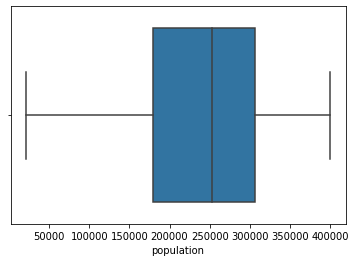

In [10]:
sns.boxplot(tbl['population'])


<AxesSubplot:xlabel='population', ylabel='Count'>

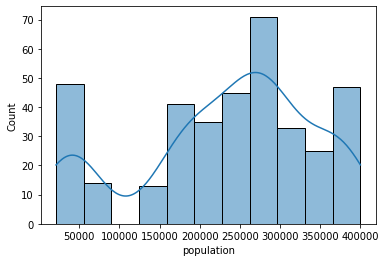

In [11]:
sns.histplot(tbl['population'],kde = True)

In [12]:

dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]


## z-score formula:
 
 (Xi - mean)/std

In [13]:

## FINDING THE OUTLIERS USING Z-SCORE
outliers = []

def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            
    return outliers

In [14]:
detect_outliers(dataset)

[102, 107, 108]

#### FINDING THE OUTLIERS USING IQR
## IQR

1. sorting the data
2. calculating the Q1 and Q3
3. IQR(Q3 - Q1)
4. find the lower fence(Q1 - 1.5(IQR))
5. find the higher fence(Q3 + 1.5(IQR))

In [15]:
#sorting the dataset

dataset = sorted(dataset)


In [16]:
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [17]:
# calculating the Q1 and Q3
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)

12.0 15.0


In [18]:
# finding the IQR
IQR = q3 - q1
print(IQR)

3.0


In [19]:
#finding the lower fence and higher fence
lower_fence = (q1 - (1.5*IQR))

higher_fence = (q3 + (1.5*IQR))

print(lower_fence , higher_fence)

7.5 19.5


c:\users\ramdu\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

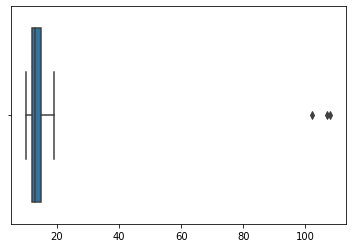

In [20]:
sns.boxplot(dataset)

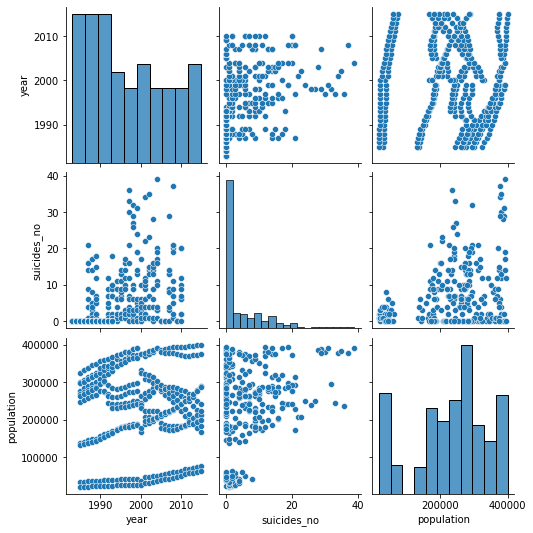

In [75]:
sns.pairplot(tbl)

##### example : Z - test problem 


Suppose the IQ in a certain population is nominally distributed with a mean of 100,and the SD of 15.
  A researcher wants to know if a new drug affects IQ level, so he recriuts 20 patients to try it and the record their IQ level.
  The following code shows how to perform a one sample Z-test in python  to determine if the new drug causes a significant differnece in IQ levels ?

In [25]:
from statsmodels.stats.weightstats import ztest as ztest

In [31]:
## sample IQ levels of 20 patients
data = [90,90,99,93,99,91,95,129,118,107,102,97,91,98,100,91,103,101,121,113]

ztest(data,value = 100)

(0.5652848279178434, 0.5718800466877703)

##### p_value < 0.05 reject NULL-hypothesis , else accept the NULL-hypothesis.

In [32]:
## T-test

ages = [10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [33]:
ages_mean = np.mean(ages)

In [34]:
ages_mean

30.34375

In [46]:
sample_size = 10
age_sample = np.random.choice(ages,sample_size)

In [47]:
age_sample

array([28, 18, 28, 35, 65, 21, 10, 18, 30, 14])

In [48]:
np.mean(age_sample)

26.7

In [49]:
from scipy.stats import ttest_1samp

In [50]:
ttest_1samp(age_sample,30.34375)

Ttest_1sampResult(statistic=-0.7413615684182984, pvalue=0.4773721732792211)

In [51]:
ttest_1samp(age_sample,29.4)

Ttest_1sampResult(statistic=-0.5493451073013803, pvalue=0.5961337411016989)

###### example - 2

In [52]:
# ages of the college students(population)
# 1 class students mean of all the ages.


In [56]:
import scipy.stats as stats
import math

In [57]:
np.random.seed(6)
school_ages = stats.poisson.rvs(loc = 18, mu = 35, size = 1500)
classA_ages = stats.poisson.rvs(loc = 18, mu = 30, size = 60)


In [58]:
school_ages

array([62, 59, 44, ..., 45, 52, 50])

In [59]:
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45])

In [60]:
classA_ages.mean()

46.9

In [63]:
school_ages.mean()

53.303333333333335

In [67]:
_,p_value = ttest_1samp(classA_ages,popmean = school_ages.mean())

In [68]:
_,p_value

(-9.604796510704091, 1.139027071016194e-13)

In [76]:
if p_value < 0.05:
    print("REJECT H0")
else:
    print("ACCEPT H0")

REJECT H0


#### corelation

In [72]:
tbl

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
495,Anguilla,1993,female,5-14 years,0.0,NaN
496,Anguilla,1993,female,55-74 years,0.0,NaN
497,Anguilla,1993,female,75+ years,0.0,NaN
498,Anguilla,1993,male,15-24 years,0.0,NaN


In [73]:
tbl.corr()

,year,suicides_no,population
year,1.000000,0.329799,-0.012470
suicides_no,0.329799,1.000000,0.328321
population,-0.012470,0.328321,1.000000
